# Sea Level Predictor

This project is an assignment for a [freeCodeCamp Data Analysis with Python Certification](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/sea-level-predictor 'Sea Level Predictor'). Analyze a **[dataset](https://raw.githubusercontent.com/fishenzone/portfolio/main/data/epa-sea-level.csv 'CSV file Sea Level')** of the global average sea level change since 1880 and use the data to predict the sea level change through year 2050.

***[Click here](https://replit.com/@Fishenzone/sea-level-predictor#README.md 'Replit Sea Level Predictor') to see the link to the data, as well as the full description of the coding challenge.*** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

df = pd.read_csv('./data/epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


### Create scatter plot

Requirements:
- Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix

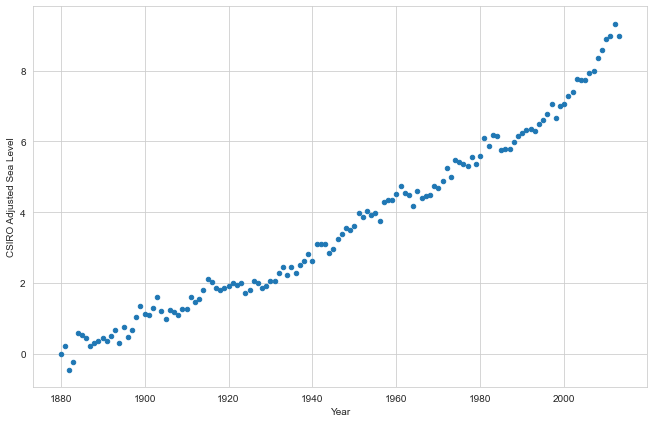

In [2]:
sns.set_style('whitegrid')

df.plot.scatter(
    x = 'Year',
    y = 'CSIRO Adjusted Sea Level',
    figsize = (11, 7)
)

plt.show()

As we see, the data is a bit scattered. We will use *linear regression* to find the most fitting model to our prediction. The goal is basically to find the linear model $y = ax+b $ that fits the most (i.e. with the minimum possible loss). For that we use the **least squares regression** which calculates:
* the slope, given by the equation:
$$ a = \frac{ N \sum xy - \sum x \sum y}{N \sum x^2 - \left( \sum x \right)^2 } $$

* the y-intercept, given by the equation:
$$ b = \frac{ \sum y - a \sum x}{N} $$

### Create first line of best fit

- Use the `linregress` function from `scipy.stats` to get the *slope* and *y-intercept* of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050

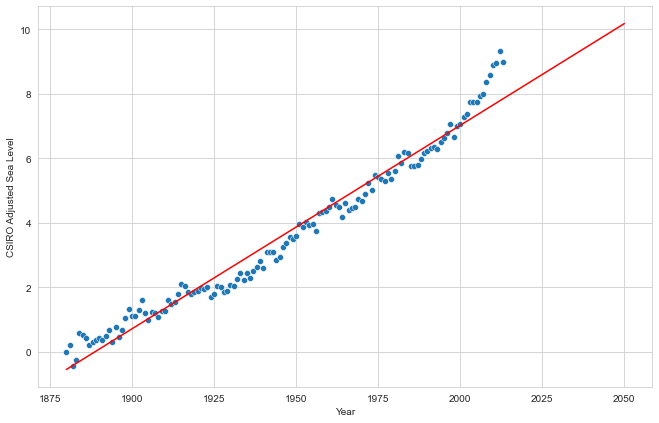

In [3]:
regress1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
a1, b1 = regress1.slope, regress1.intercept
x1 = np.arange(1880, 2051)
y1 = [a1 * x + b1 for x in x1]
   
plt.figure(figsize = (11, 7))
sns.scatterplot(
    data = df, 
    x = "Year", 
    y = "CSIRO Adjusted Sea Level",
)
plt.plot(x1, y1, 'r')

plt.show()

### Create second line of best fit

**Requirements:**
- Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000

In [4]:
mask = df['Year'] >= 2000
regress2 = linregress(
    df[mask]['Year'],
    df[mask]['CSIRO Adjusted Sea Level']
)
a2, b2 = regress2.slope, regress2.intercept
x2 = np.arange(2000, 2051)
y2 = [a2 * x + b2 for x in x2]

### Add labels and title

Requirements:
- The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise of the Sea Level"

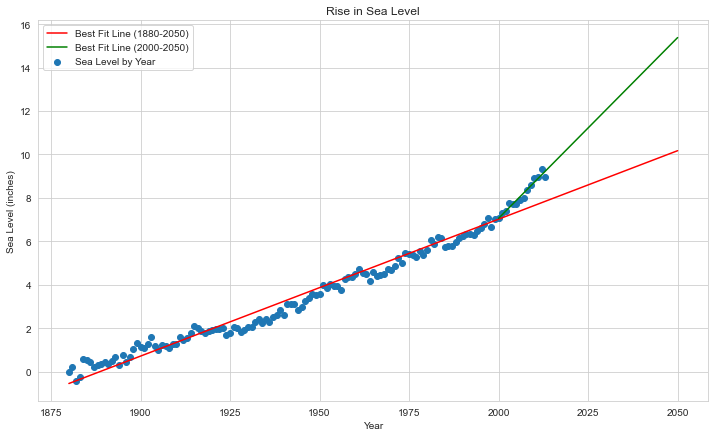

In [5]:
plt.figure(figsize = (12, 7))

plt.scatter(
    df['Year'],
    df['CSIRO Adjusted Sea Level'],
    label = 'Sea Level by Year'
)

plt.plot(
    x1,
    y1,
    'r',
    label = 'Best Fit Line (1880-2050)' 
)

plt.plot(
    x2,
    y2,
    'g',
    label = 'Best Fit Line (2000-2050)'
)

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

plt.legend()
plt.show()